First we import the libraries that we are going to need

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

We are going to create a Perceptron class, which will include the variables we will need to make our perceptron work.
We set the bias to 1, as is common for a neuron, and initialize two empty variables for the weights and the errors. We also define the training ratio (lr) and the number of iterations (epochs).

***Perceptron class functions:***

**__linear:** function in charge of carrying out the calculation y=w_0+w_1+⋯+w_n The np.dot function multiplies two vectors element by element, which is what we need.

**__activation_step:** activation function. np.where will return the value 1 when the input is >0 and the value 0 in all other cases

**fit:** For each of the inputs, we calculate y_hat, which will be the label estimated by the network, and compare it with y_target (the labels of the training dataset).

**predict:** prediction function, which will be used to make inferences with new data once the weights have been calculated


In [ ]:
class Perceptron(object):
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.bias = 1
        self.epochs = epochs
        self.weights = None
        self.errors_ = []
    
    def __linear(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def __activation_step(self, Y):
        return np.where(Y>=0, 1, 0)

    def fit(self, X, y):
        
        assert len(X) == len(y), "X e Y deben tener la misma longitud"
        
        # Initialize the weights to 0, minus the bias weight which is initialized to 1 (self.bias)
        weights = np.zeros(X.shape[1])
        self.weights = np.insert(weights, 0, self.bias, axis=0)

        for _ in range(self.epochs):
            errors = 0
            for xi, y_target in zip(X, y):
                z = self.__linear(xi)  # Weighted sum
                y_hat = self.__activation_step(z)  # Activation function
                # We calculate the difference between input and output, and apply the learning rate
                delta = self.lr * (y_target - y_hat)  
        
                # We use the calculated delta parameter to update the weights
                self.weights[1:] += delta * xi
                self.weights[0] += delta
                
                errors += int(delta != 0.0)

            self.errors_.append(errors)
            # We interrupt the training if the error is 0          
            if not errors:
                break

    def predict(self, X):
        assert type(self.weights) != 'NoneType', "Entrena el modelo primero."
        y_hat = np.zeros(X.shape[0],)
        for i, xi in enumerate(X):
            y_hat[i] = self.__activation_step(self.__linear(xi))
        return y_hat

    def score(sef, predictions, labels):
        return accuracy_score(labels, predictions)

    def plot(self, predictions, labels):
        assert type(self.weights) != 'NoneType',  "Entrena el modelo primero."
        plt.figure(figsize=(10,8))
        plt.grid(True)

        for input, target in zip(predictions, labels):
            plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'go')

        for i in np.linspace(np.amin(predictions[:,:1]),np.amax(predictions[:,:1])):
            slope = -(self.weights[0]/self.weights[2])/(self.weights[0]/self.weights[1])  
            intercept = -self.weights[0]/self.weights[2]

            # y = mx+b, equation of a line. mx = slope, n = intercept
            y = (slope*i) + intercept
            plt.plot(i, y, color='black', marker='x', linestyle='dashed')



Now that we have everything we need for our perceptron, let's see if we can actually make it work. For this we use the sklearn make_blobs library that allows us to generate point clouds to use as training examples.



0.995

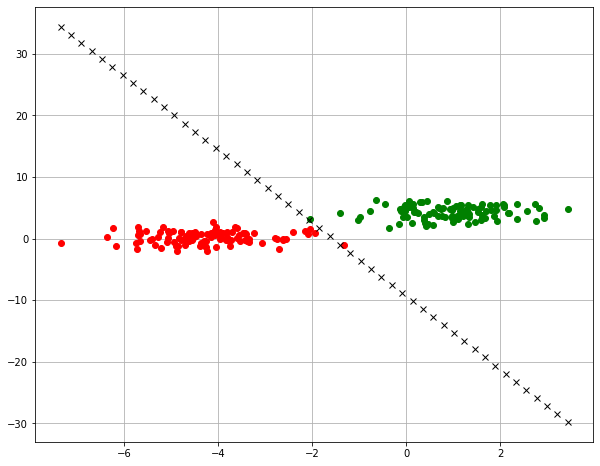

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# We generate 2 clusters of points, with 2 features each 1
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.05, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# We initialize our perceptron
p = Perceptron()

# We now adjust our perceptron with the data generated by make_blobs
p.fit(X_train,y_train)
p.plot((X_test), y_test)
p.score(p.predict(X_test), y_test)